In [1]:
!pip3 install pandas
!pip3 install prophet

In [2]:
import pandas as pd
from prophet import Prophet
from datetime import datetime
import matplotlib.pyplot as plt
import requests
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
from prophet.plot import plot_cross_validation_metric
import json


In [3]:
df = pd.read_csv('./london_weather.csv')

In [4]:
df

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0
...,...,...,...,...,...,...,...,...,...,...
15336,20201227,1.0,0.9,32.0,7.5,7.5,7.6,2.0,98000.0,NaN
15337,20201228,7.0,3.7,38.0,3.6,1.1,-1.3,0.2,97370.0,NaN
15338,20201229,7.0,0.0,21.0,4.1,2.6,1.1,0.0,98830.0,NaN
15339,20201230,6.0,0.4,22.0,5.6,2.7,-0.1,0.0,100200.0,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              15341 non-null  int64  
 1   cloud_cover       15322 non-null  float64
 2   sunshine          15341 non-null  float64
 3   global_radiation  15322 non-null  float64
 4   max_temp          15335 non-null  float64
 5   mean_temp         15305 non-null  float64
 6   min_temp          15339 non-null  float64
 7   precipitation     15335 non-null  float64
 8   pressure          15337 non-null  float64
 9   snow_depth        13900 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 1.2 MB


In [6]:
def convert_int_to_datetime(date_int):
    date_str = str(date_int)
    return datetime.strptime(date_str, '%Y%m%d')

df['date'] = df['date'].apply(convert_int_to_datetime)
df

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,1979-01-01,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,1979-01-02,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,1979-01-03,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,1979-01-04,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,1979-01-05,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0
...,...,...,...,...,...,...,...,...,...,...
15336,2020-12-27,1.0,0.9,32.0,7.5,7.5,7.6,2.0,98000.0,NaN
15337,2020-12-28,7.0,3.7,38.0,3.6,1.1,-1.3,0.2,97370.0,NaN
15338,2020-12-29,7.0,0.0,21.0,4.1,2.6,1.1,0.0,98830.0,NaN
15339,2020-12-30,6.0,0.4,22.0,5.6,2.7,-0.1,0.0,100200.0,NaN


In [7]:
mean_df = df[['date', 'mean_temp']]
mean_df = mean_df.rename(columns={'date':'ds', 'mean_temp': 'y'})

In [8]:
mean_df

,ds,y
0,1979-01-01,-4.1
1,1979-01-02,-2.6
2,1979-01-03,-2.8
3,1979-01-04,-2.6
4,1979-01-05,-0.8
...,...,...
15336,2020-12-27,7.5
15337,2020-12-28,1.1
15338,2020-12-29,2.6
15339,2020-12-30,2.7


In [9]:
model = Prophet()
model.fit(mean_df)
future = model.make_future_dataframe(periods=1826)

18:54:47 - cmdstanpy - INFO - Chain [1] start processing
18:54:49 - cmdstanpy - INFO - Chain [1] done processing


In [10]:
future

,ds
0,1979-01-01
1,1979-01-02
2,1979-01-03
3,1979-01-04
4,1979-01-05
...,...
17126,2025-12-27
17127,2025-12-28
17128,2025-12-29
17129,2025-12-30


In [11]:
forecast = model.predict(future)

In [12]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1979-01-01,10.073556,0.568538,7.991464,10.073556,10.073556,-5.967687,-5.967687,-5.967687,-0.009022,-0.009022,-0.009022,-5.958666,-5.958666,-5.958666,0.0,0.0,0.0,4.105869
1,1979-01-02,10.074010,0.383342,7.650012,10.074010,10.074010,-6.015453,-6.015453,-6.015453,-0.020539,-0.020539,-0.020539,-5.994914,-5.994914,-5.994914,0.0,0.0,0.0,4.058557
2,1979-01-03,10.074464,0.455577,7.499073,10.074464,10.074464,-5.986647,-5.986647,-5.986647,0.045498,0.045498,0.045498,-6.032145,-6.032145,-6.032145,0.0,0.0,0.0,4.087817
3,1979-01-04,10.074918,0.274710,7.413628,10.074918,10.074918,-6.045813,-6.045813,-6.045813,0.024069,0.024069,0.024069,-6.069882,-6.069882,-6.069882,0.0,0.0,0.0,4.029105
4,1979-01-05,10.075372,0.131095,7.795367,10.075372,10.075372,-6.115762,-6.115762,-6.115762,-0.008151,-0.008151,-0.008151,-6.107611,-6.107611,-6.107611,0.0,0.0,0.0,3.959610
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17126,2025-12-27,13.249573,3.946470,11.148954,12.851515,13.613739,-5.840213,-5.840213,-5.840213,-0.028972,-0.028972,-0.028972,-5.811241,-5.811241,-5.811241,0.0,0.0,0.0,7.409360
17127,2025-12-28,13.249899,3.749764,11.169063,12.851610,13.614556,-5.840961,-5.840961,-5.840961,-0.002883,-0.002883,-0.002883,-5.838078,-5.838078,-5.838078,0.0,0.0,0.0,7.408938
17128,2025-12-29,13.250225,3.859011,11.097533,12.851706,13.615373,-5.876358,-5.876358,-5.876358,-0.009022,-0.009022,-0.009022,-5.867337,-5.867337,-5.867337,0.0,0.0,0.0,7.373867
17129,2025-12-30,13.250551,3.514619,10.878294,12.851802,13.616190,-5.919392,-5.919392,-5.919392,-0.020539,-0.020539,-0.020539,-5.898853,-5.898853,-5.898853,0.0,0.0,0.0,7.331159


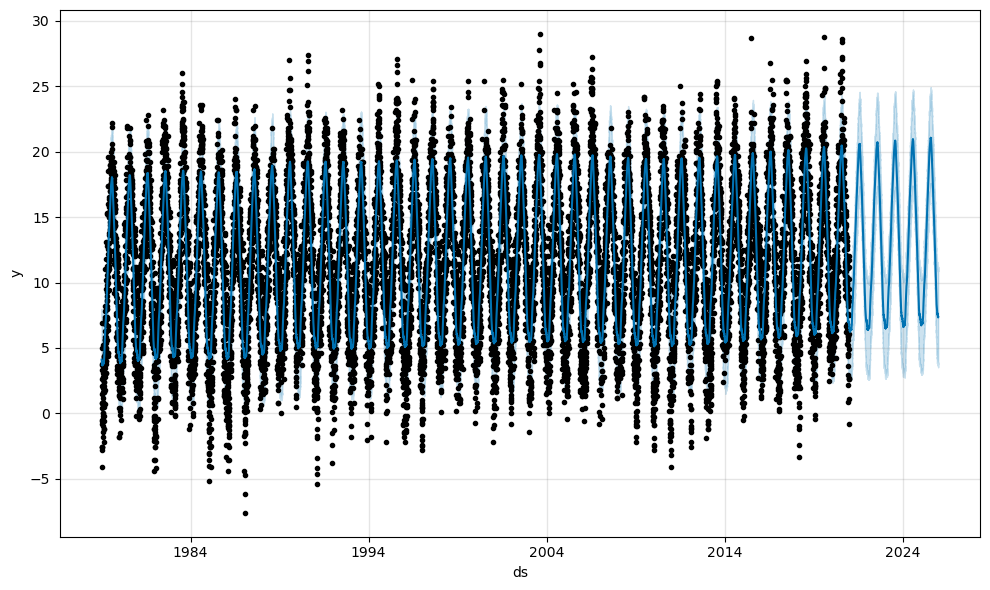

In [13]:
# This shows a narrow prediction line, indicating past trends can be used to make a prediction about average daily temps
fig = model.plot(forecast)

In [14]:
max_df = df[['date', 'max_temp']]
max_df = max_df.rename(columns={'date':'ds', 'max_temp': 'y'})

min_df = df[['date', 'min_temp']]
min_df = min_df.rename(columns={'date':'ds', 'min_temp': 'y'})

In [15]:
model_max = Prophet()
model_max.fit(max_df)
future_max = model_max.make_future_dataframe(periods=1825)

model_min = Prophet()
model_min.fit(min_df)
future_min = model_min.make_future_dataframe(periods=1825)

18:54:57 - cmdstanpy - INFO - Chain [1] start processing
18:54:59 - cmdstanpy - INFO - Chain [1] done processing
18:55:01 - cmdstanpy - INFO - Chain [1] start processing
18:55:02 - cmdstanpy - INFO - Chain [1] done processing


In [16]:
forecast_max = model_max.predict(future_max)

forecast_min = model_min.predict(future_min)

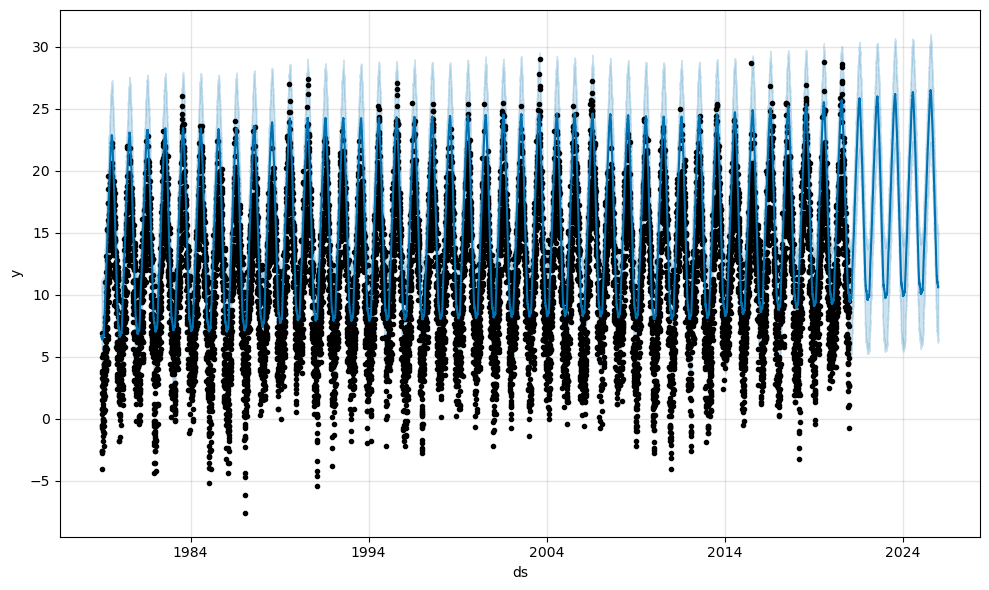

In [17]:
fig_max = model.plot(forecast_max)

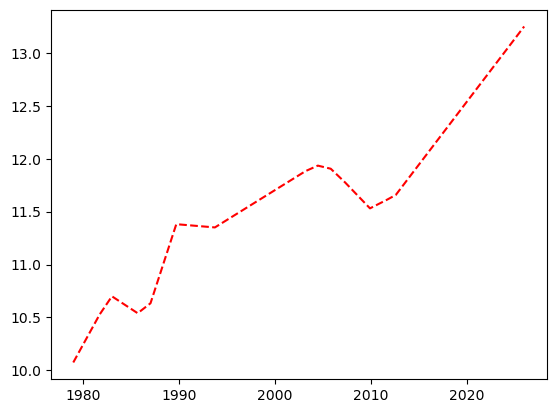

In [18]:
linear_reg_line = plt.plot(forecast['ds'], forecast['trend'], linestyle='--', color='red', label='Linear Regression Line')

In [19]:
forecast = forecast.set_index('ds')

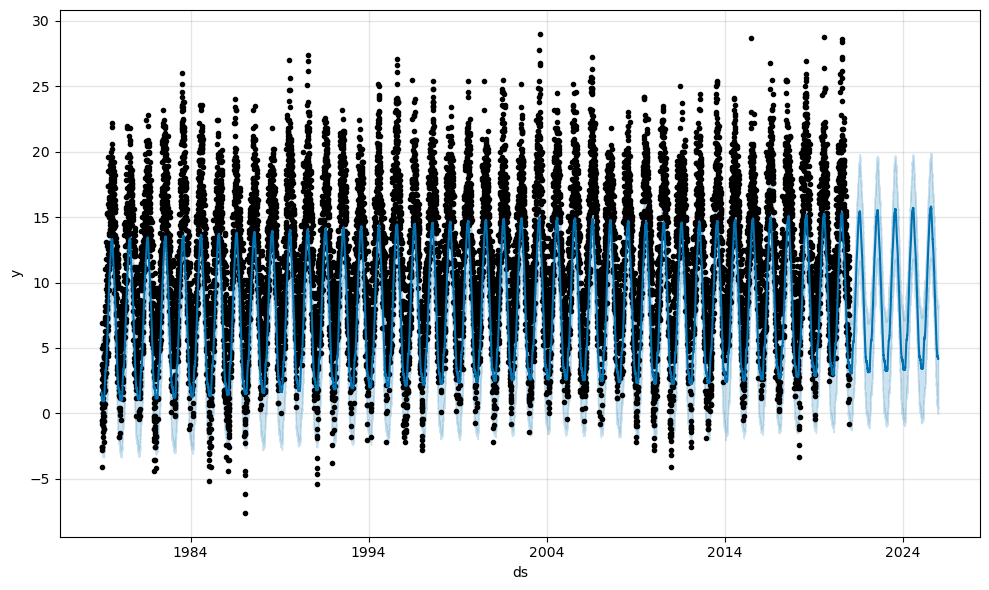

In [20]:
fig_min = model.plot(forecast_min)

<Axes: xlabel='ds'>

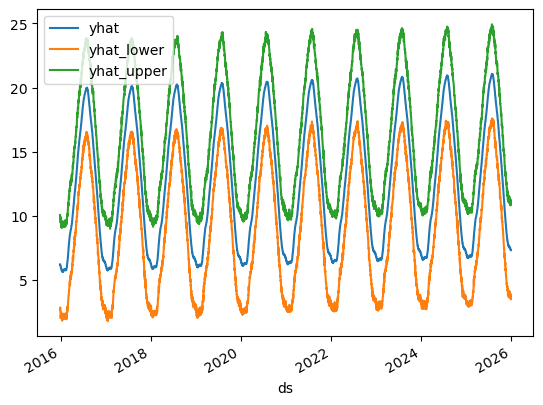

In [21]:
forecast[['yhat', 'yhat_lower', 'yhat_upper']].iloc[-3650:,:].plot()

In [22]:
# Prophet forecast with smaller dataseries

In [23]:
# MAPE calculation using weather API

In [24]:
api = "http://api.openweathermap.org/geo/1.0/direct?q=London&limit=5&appid=284e496da06f1c5662d7a763ce4950b8"

get_api = requests.get(api)
get_api

<Response [200]>

In [25]:
get_api.json()

[{'name': 'London',
  'local_names': {'es': 'Londres',
   'io': 'London',
   'li': 'Londe',
   'is': 'London',
   'ff': 'London',
   'mk': 'Лондон',
   'nn': 'London',
   'sw': 'London',
   'fo': 'London',
   'yi': 'לאנדאן',
   'hy': 'Լոնդոն',
   'sk': 'Londýn',
   'bm': 'London',
   'ur': 'علاقہ لندن',
   'vo': 'London',
   'cu': 'Лондонъ',
   'mn': 'Лондон',
   'wa': 'Londe',
   'os': 'Лондон',
   'rm': 'Londra',
   'fi': 'Lontoo',
   'et': 'London',
   'sc': 'Londra',
   'st': 'London',
   'sh': 'London',
   'ta': 'இலண்டன்',
   'mt': 'Londra',
   'eu': 'Londres',
   'it': 'Londra',
   'tw': 'London',
   'bi': 'London',
   'lo': 'ລອນດອນ',
   'ee': 'London',
   'ka': 'ლონდონი',
   'cy': 'Llundain',
   'uk': 'Лондон',
   'ab': 'Лондон',
   'bn': 'লন্ডন',
   'ie': 'London',
   'zh': '伦敦',
   'cs': 'Londýn',
   'ha': 'Landan',
   'kv': 'Лондон',
   'ga': 'Londain',
   'sn': 'London',
   'cv': 'Лондон',
   'my': 'လန်ဒန်မြို့',
   'na': 'London',
   'ps': 'لندن',
   'th': 'ลอนดอน',
   'se'

In [26]:
london = get_api.json()[0]
london

{'name': 'London',
 'local_names': {'es': 'Londres',
  'io': 'London',
  'li': 'Londe',
  'is': 'London',
  'ff': 'London',
  'mk': 'Лондон',
  'nn': 'London',
  'sw': 'London',
  'fo': 'London',
  'yi': 'לאנדאן',
  'hy': 'Լոնդոն',
  'sk': 'Londýn',
  'bm': 'London',
  'ur': 'علاقہ لندن',
  'vo': 'London',
  'cu': 'Лондонъ',
  'mn': 'Лондон',
  'wa': 'Londe',
  'os': 'Лондон',
  'rm': 'Londra',
  'fi': 'Lontoo',
  'et': 'London',
  'sc': 'Londra',
  'st': 'London',
  'sh': 'London',
  'ta': 'இலண்டன்',
  'mt': 'Londra',
  'eu': 'Londres',
  'it': 'Londra',
  'tw': 'London',
  'bi': 'London',
  'lo': 'ລອນດອນ',
  'ee': 'London',
  'ka': 'ლონდონი',
  'cy': 'Llundain',
  'uk': 'Лондон',
  'ab': 'Лондон',
  'bn': 'লন্ডন',
  'ie': 'London',
  'zh': '伦敦',
  'cs': 'Londýn',
  'ha': 'Landan',
  'kv': 'Лондон',
  'ga': 'Londain',
  'sn': 'London',
  'cv': 'Лондон',
  'my': 'လန်ဒန်မြို့',
  'na': 'London',
  'ps': 'لندن',
  'th': 'ลอนดอน',
  'se': 'London',
  'sm': 'Lonetona',
  'ku': 'London',
  

In [27]:
london['lat']

51.5073219

In [28]:
london['lon']

-0.1276474

In [29]:
london_api = "https://api.openweathermap.org/data/3.0/onecall/day_summary?lat=51.5073219&lon=-0.1276474&date=2016-01-01&tz=+05:00&appid=77ab0d254ac9b998b6aabc97fcdd0896&units=metric"
response = requests.get(london_api)
response

<Response [200]>

In [30]:
import datetime
import time

In [31]:
def generate_dates(start_date, end_date):
    dates = []
    target_date = start_date
    while target_date <= end_date:
        dates.append(target_date)
        target_date += datetime.timedelta(days=1)
    return dates

def get_api_london(date):
    london_api = "https://api.openweathermap.org/data/3.0/onecall/day_summary?lat={lat}&lon={lon}&date={date}&tz=+05:00&appid=77ab0d254ac9b998b6aabc97fcdd0896&units=metric"
    response = requests.get(london_api.format(lat=51.5074, lon=0.1278, date=date.strftime('%Y-%m-%d')))
    return response

start_date = datetime.datetime(2020, 1, 1)
end_date = datetime.datetime(2020, 1, 15)
dates = generate_dates(start_date, end_date)
min_temps = []
max_temps = []
mean_temps = []

for date in dates:
    api_response = get_api_london(date)
    if api_response.status_code == 200:
        data = api_response.json()
        min_temp = data['temperature']['min']
        max_temp = data['temperature']['max']
        mean_temp = data['temperature']['afternoon']
        min_temps.append(min_temp)
        max_temps.append(max_temp)
        mean_temps.append(mean_temp)
    else:
        print(f"Error: Unable to fetch data for date {date}")

    time.sleep(2)
    
weather_df = pd.DataFrame({
    'ds': dates,
    'Minimum Temperature (C)': min_temps,
    'Maximum Temperature (C)': max_temps,
    'Average Temperature (C)': mean_temps
})

weather_df

,ds,Minimum Temperature (C),Maximum Temperature (C),Average Temperature (C)
0,2020-01-01,3.31,6.33,5.51
1,2020-01-02,6.42,10.25,9.37
2,2020-01-03,3.38,10.10,5.65
3,2020-01-04,4.35,8.26,6.34
4,2020-01-05,6.19,8.29,7.71
5,2020-01-06,4.91,8.03,7.74
6,2020-01-07,5.09,12.28,10.71
7,2020-01-08,9.43,11.71,10.07
8,2020-01-09,5.72,12.03,10.65
9,2020-01-10,3.95,7.43,5.33


In [32]:
mape_df = pd.merge(weather_df,forecast, on= "ds", how = "outer")
mape_df.head(15)

,ds,Minimum Temperature (C),Maximum Temperature (C),Average Temperature (C),trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-01,3.31,6.33,5.51,12.536773,2.834815,10.406704,12.536773,12.536773,-5.904311,...,0.045498,0.045498,0.045498,-5.949808,-5.949808,-5.949808,0.0,0.0,0.0,6.632462
1,2020-01-02,6.42,10.25,9.37,12.537099,2.662073,10.332318,12.537099,12.537099,-5.961673,...,0.024069,0.024069,0.024069,-5.985742,-5.985742,-5.985742,0.0,0.0,0.0,6.575426
2,2020-01-03,3.38,10.10,5.65,12.537425,2.900879,10.161602,12.537425,12.537425,-6.030922,...,-0.008151,-0.008151,-0.008151,-6.022771,-6.022771,-6.022771,0.0,0.0,0.0,6.506503
3,2020-01-04,4.35,8.26,6.34,12.537751,2.708210,10.084230,12.537751,12.537751,-6.089400,...,-0.028972,-0.028972,-0.028972,-6.060428,-6.060428,-6.060428,0.0,0.0,0.0,6.448351
4,2020-01-05,6.19,8.29,7.71,12.538077,2.569728,9.994086,12.538077,12.538077,-6.101091,...,-0.002883,-0.002883,-0.002883,-6.098208,-6.098208,-6.098208,0.0,0.0,0.0,6.436986
5,2020-01-06,4.91,8.03,7.74,12.538403,2.744205,10.053382,12.538403,12.538403,-6.144605,...,-0.009022,-0.009022,-0.009022,-6.135583,-6.135583,-6.135583,0.0,0.0,0.0,6.393798
6,2020-01-07,5.09,12.28,10.71,12.538729,2.756569,10.139372,12.538729,12.538729,-6.192552,...,-0.020539,-0.020539,-0.020539,-6.172013,-6.172013,-6.172013,0.0,0.0,0.0,6.346176
7,2020-01-08,9.43,11.71,10.07,12.539054,2.561158,9.968679,12.539054,12.539054,-6.161466,...,0.045498,0.045498,0.045498,-6.206964,-6.206964,-6.206964,0.0,0.0,0.0,6.377589
8,2020-01-09,5.72,12.03,10.65,12.539380,2.471205,9.859836,12.539380,12.539380,-6.215851,...,0.024069,0.024069,0.024069,-6.239919,-6.239919,-6.239919,0.0,0.0,0.0,6.323530
9,2020-01-10,3.95,7.43,5.33,12.539706,2.666343,10.150127,12.539706,12.539706,-6.278551,...,-0.008151,-0.008151,-0.008151,-6.270400,-6.270400,-6.270400,0.0,0.0,0.0,6.261155


In [43]:
mape_df = mape_df[["ds", "Average Temperature (C)", "Minimum Temperature (C)","Maximum Temperature (C)","trend","trend_lower","trend_upper"]]
mape_df.head(15)

,ds,Average Temperature (C),Minimum Temperature (C),Maximum Temperature (C),trend,trend_lower,trend_upper
0,2020-01-01,5.51,3.31,6.33,12.536773,12.536773,12.536773
1,2020-01-02,9.37,6.42,10.25,12.537099,12.537099,12.537099
2,2020-01-03,5.65,3.38,10.10,12.537425,12.537425,12.537425
3,2020-01-04,6.34,4.35,8.26,12.537751,12.537751,12.537751
4,2020-01-05,7.71,6.19,8.29,12.538077,12.538077,12.538077
5,2020-01-06,7.74,4.91,8.03,12.538403,12.538403,12.538403
6,2020-01-07,10.71,5.09,12.28,12.538729,12.538729,12.538729
7,2020-01-08,10.07,9.43,11.71,12.539054,12.539054,12.539054
8,2020-01-09,10.65,5.72,12.03,12.539380,12.539380,12.539380
9,2020-01-10,5.33,3.95,7.43,12.539706,12.539706,12.539706


In [44]:
#MAPE - mean temp

In [45]:
dates = mape_df['ds']

actual_values  = mape_df['Average Temperature (C)']
forecasted_values = mape_df['trend']

def calculate_mape(actual, forecast):
    return (abs((actual - forecast) / actual)) * 100

mape_values = [calculate_mape(actual, forecast) for actual, forecast in zip(actual_values, forecasted_values)]

data = {'Date': dates, 'Actual': actual_values, 'Forecasted': forecasted_values, 'MAPE': mape_values}
df= pd.DataFrame(data)
df.head(15)

,Date,Actual,Forecasted,MAPE
0,2020-01-01,5.51,12.536773,127.527640
1,2020-01-02,9.37,12.537099,33.800415
2,2020-01-03,5.65,12.537425,121.901324
3,2020-01-04,6.34,12.537751,97.756321
4,2020-01-05,7.71,12.538077,62.620968
5,2020-01-06,7.74,12.538403,61.994865
6,2020-01-07,10.71,12.538729,17.074963
7,2020-01-08,10.07,12.539054,24.518912
8,2020-01-09,10.65,12.539380,17.740661
9,2020-01-10,5.33,12.539706,135.266534


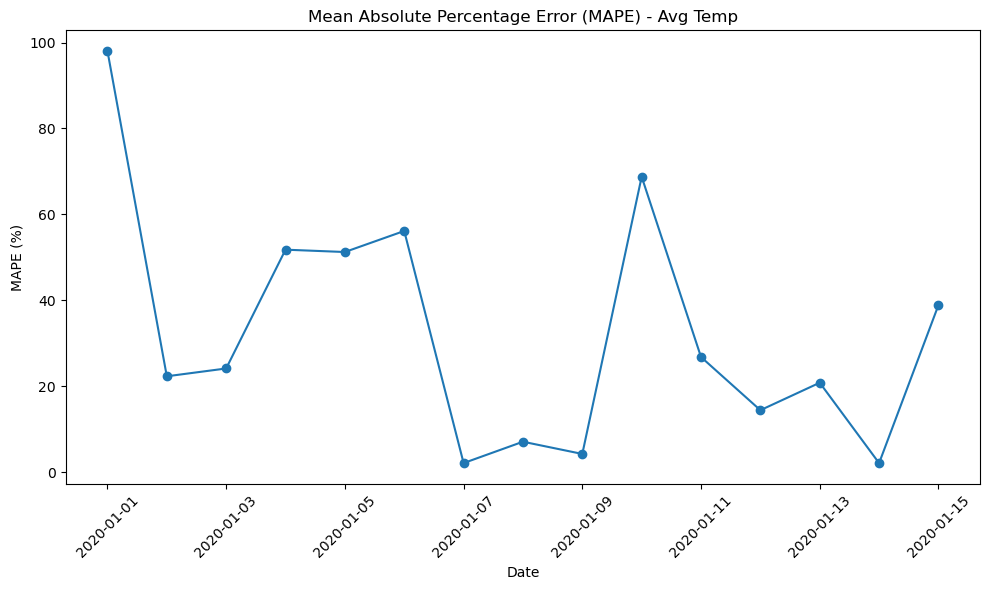

In [55]:
x= df['Date']
y = df['MAPE']

plt.figure(figsize=(10, 6))
plt.plot(x,y, marker='o')
plt.title('Mean Absolute Percentage Error (MAPE) - Avg Temp')
plt.xlabel('Date')
plt.ylabel('MAPE (%)')
plt.xticks(rotation=45)
plt.tight_layout() 
plt.show()

In [47]:
#MAPE - min temp

In [48]:
x= df['Date']
y = df['MAPE']

actual_values  = mape_df['Minimum Temperature (C)']
forecasted_values = mape_df['trend_lower'] 

def calculate_mape(actual, forecast):
    return (abs((actual - forecast) / actual)) * 100

mape_values = [calculate_mape(actual, forecast) for actual, forecast in zip(actual_values, forecasted_values)]

data = {'Date': dates, 'Actual': actual_values, 'Forecasted': forecasted_values, 'MAPE': mape_values}
df= pd.DataFrame(data)
df.head(15)

,Date,Actual,Forecasted,MAPE
0,2020-01-01,3.31,12.536773,278.754470
1,2020-01-02,6.42,12.537099,95.281914
2,2020-01-03,3.38,12.537425,270.929728
3,2020-01-04,4.35,12.537751,188.224155
4,2020-01-05,6.19,12.538077,102.553742
5,2020-01-06,4.91,12.538403,155.364615
6,2020-01-07,5.09,12.538729,146.340442
7,2020-01-08,9.43,12.539054,32.969824
8,2020-01-09,5.72,12.539380,119.219936
9,2020-01-10,3.95,12.539706,217.460919


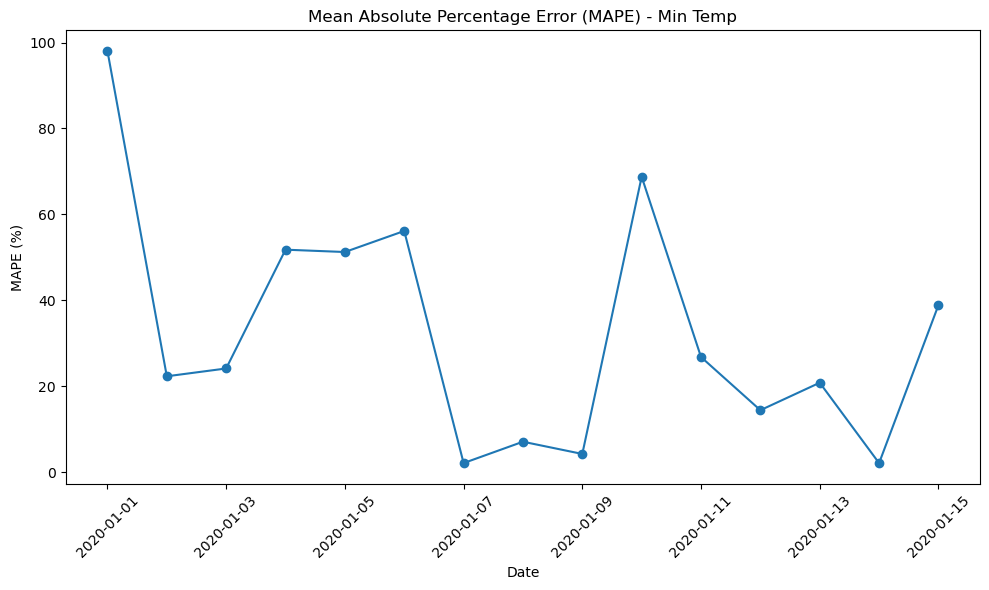

In [56]:
plt.figure(figsize=(10, 6))
plt.plot(x,y, marker='o')
plt.title('Mean Absolute Percentage Error (MAPE) - Min Temp')
plt.xlabel('Date')
plt.ylabel('MAPE (%)')
plt.xticks(rotation=45)
plt.tight_layout() 
plt.show()

In [ ]:
#MAPE - max temp

In [50]:
x= df['Date']
y = df['MAPE']

actual_values  = mape_df['Maximum Temperature (C)']
forecasted_values = mape_df['trend_upper'] 

def calculate_mape(actual, forecast):
    return (abs((actual - forecast) / actual)) * 100

mape_values = [calculate_mape(actual, forecast) for actual, forecast in zip(actual_values, forecasted_values)]

data = {'Date': dates, 'Actual': actual_values, 'Forecasted': forecasted_values, 'MAPE': mape_values}
df= pd.DataFrame(data)
df.head(15)

,Date,Actual,Forecasted,MAPE
0,2020-01-01,6.33,12.536773,98.053285
1,2020-01-02,10.25,12.537099,22.313160
2,2020-01-03,10.10,12.537425,24.132919
3,2020-01-04,8.26,12.537751,51.788750
4,2020-01-05,8.29,12.538077,51.243385
5,2020-01-06,8.03,12.538403,56.144490
6,2020-01-07,12.28,12.538729,2.106910
7,2020-01-08,11.71,12.539054,7.079884
8,2020-01-09,12.03,12.539380,4.234251
9,2020-01-10,7.43,12.539706,68.771282


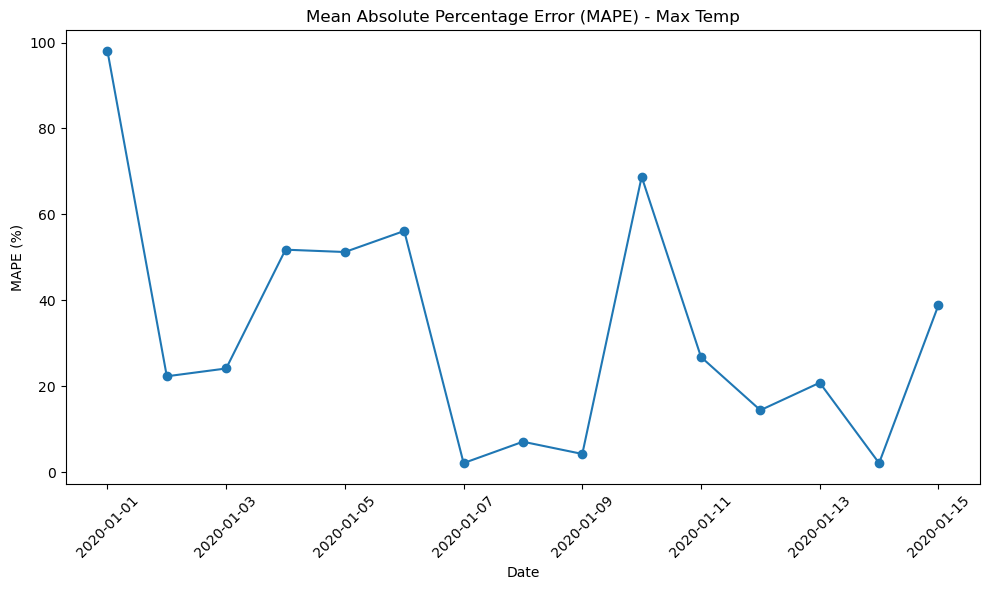

In [57]:
plt.figure(figsize=(10, 6))
plt.plot(x,y, marker='o')
plt.title('Mean Absolute Percentage Error (MAPE) - Max Temp')
plt.xlabel('Date')
plt.ylabel('MAPE (%)')
plt.xticks(rotation=45)
plt.tight_layout() 
plt.show()

In [ ]:
##Cross Validation

In [ ]:
prophet_validation = cross_validation(model, initial='730 days', period='180 days', horizon = '365 days')

In [ ]:
prophet_validation

In [ ]:
prophet_performance = performance_metrics(prophet_validation)
prophet_performance

In [ ]:
plot = plot_cross_validation_metric(prophet_validation, metric='mdape')

In [ ]:
plot = plot_cross_validation_metric(prophet_validation, metric='mdape')
plt.ylim(0,1)

In [ ]:
# Over time the changes stay consistent around 18%